# Rana-Roop Singh Bhullar

## Assignment: CA04 - Ensemble Methods

In [50]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO  
from IPython.display import Image  


from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

### Data Source and Content Info

In [51]:
# Read the data using URL link provided
url = 'https://github.com/ArinB/MSBA-CA-Data/blob/main/CA03/census_data.csv?raw=true' 
census = pd.read_csv(url, encoding = "ISO-8859-1")

In [52]:
#Inspect the data to make sure it was read correctly
#First 10 rows
census.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


In [53]:
#Last 10 rows
census.tail(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48832,d. 41-50 & 61-70,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,c. 31-35 & 61-70,test,0
48833,b. 31-40,c. Mid - Mid,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,c. 31-35 & 61-70,test,0
48834,b. 31-40,a. Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,a. 0-25,test,0
48835,b. 31-40,a. Low,b. Mid,a. = 0,c. High,d. 14,d. Masters,b. income,e. 40-55,test,0
48836,b. 31-40,e. High,a. Low,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,0
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


### Data Quality Analysis

In [54]:
#Descriptive Statistics
census.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [55]:
#Rows and Columns we have
census.shape

(48842, 11)

In [56]:
# The count of records in each column
census.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [57]:
# Potential number of null values
census.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [58]:
#Check the column types
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [59]:
#Our Variables are "Objects". Convert them into category for the next steps
for column in ['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']:
    census[column] = census[column].astype('category')

In [60]:
#Confirm that the have been converted
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   hours_per_week_bin  48842 non-null  category
 1   occupation_bin      48842 non-null  category
 2   msr_bin             48842 non-null  category
 3   capital_gl_bin      48842 non-null  category
 4   race_sex_bin        48842 non-null  category
 5   education_num_bin   48842 non-null  category
 6   education_bin       48842 non-null  category
 7   workclass_bin       48842 non-null  category
 8   age_bin             48842 non-null  category
 9   flag                48842 non-null  object  
 10  y                   48842 non-null  int64   
dtypes: category(9), int64(1), object(1)
memory usage: 1.2+ MB


In [61]:
# label_encoder object is able to understand word labels in our data 
#package for endocing
from sklearn.preprocessing import LabelEncoder
 
census[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']]= census[['hours_per_week_bin','occupation_bin','msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin']].apply(LabelEncoder().fit_transform) 

In [62]:
# Confirm the output
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  int64 
 1   occupation_bin      48842 non-null  int64 
 2   msr_bin             48842 non-null  int64 
 3   capital_gl_bin      48842 non-null  int64 
 4   race_sex_bin        48842 non-null  int64 
 5   education_num_bin   48842 non-null  int64 
 6   education_bin       48842 non-null  int64 
 7   workclass_bin       48842 non-null  int64 
 8   age_bin             48842 non-null  int64 
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 4.1+ MB


### Split Data into Train and Test Sets

In [63]:
# Create train and test dataframe
census_train = census.loc[census.flag == 'train']
census_test = census.loc[census.flag == 'test']

In [64]:
census_train.drop(columns='flag', inplace=True)
census_test.drop(columns='flag', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
#Creating the train and test variables

#Variables below will be used for "train" our model
#y_census_train is our dependent variable. This is what we are trying to predict
#x_census_train has our independent variables


y_census_train = census_train['y'] 
x_census_train = census_train.drop('y', axis=1)

In [66]:
# The Variables below will be used to "test" our model. Will be used to test the accuracy 
#y_census_test has the category labels of the test data 
#x_census_test has the rest of our independent variable values
# It will be used to test and predict the accuracy of the model we are making


y_census_test = census_test['y'] 
x_census_test = census_test.drop('y', axis=1) 

### 2. Finding Optimal Value of a key Hyper-Parameter

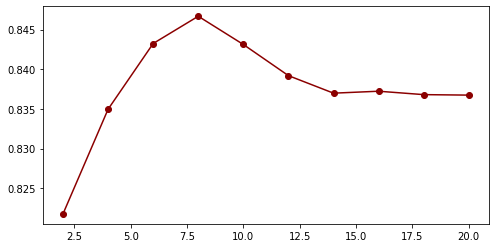

In [67]:
#how to find the optimal value of max depth
#Source used from class lecture as template


results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]

for trees in max_depth_options: 
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(x_census_train, y_census_train)
  y_pred = model.predict(x_census_test)
  accuracy = np.mean(y_census_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o')

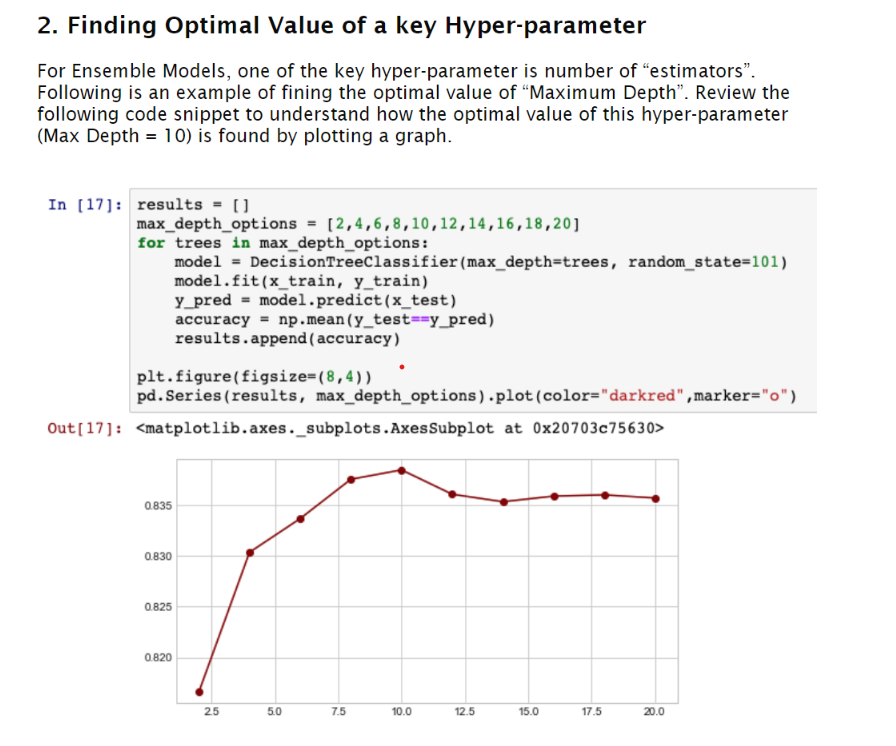

### 3. Random Forest Model

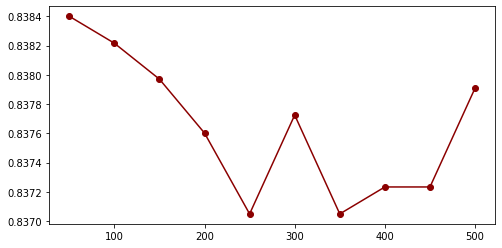

In [70]:
from sklearn.ensemble import RandomForestClassifier
#how to find the optimal number of estimators  
results = []
optimal_num_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in optimal_num_estimators:
  forest = RandomForestClassifier(n_estimators=trees, random_state=101)
  forest.fit(x_census_train, y_census_train)
  y_pred = forest.predict (x_census_test)
  accuracy = np.mean(y_census_test == y_pred)

  #Append the results with accuracy values
  results.append(accuracy)

# Create a plot in order to visualize the accuracy of the estimators
plt.figure(figsize=(8,4))
pd.Series(results, optimal_num_estimators).plot(color='darkred', marker='o')

### 4. Building AdaBoost, Gradient Boost (classifier) and XGB Model

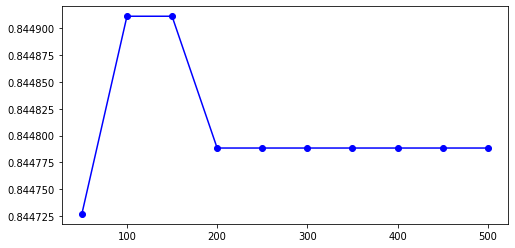

In [71]:
# Importing packages from sklearn 
from sklearn.ensemble import AdaBoostClassifier

 
adaboost_results = []
ada_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in ada_estimators:
  ada_class = AdaBoostClassifier(n_estimators=trees, random_state=101)
  ada_class.fit(x_census_train, y_census_train)
  y_pred = ada_class.predict (x_census_test)

  
  accuracy = np.mean(y_census_test == y_pred)
  adaboost_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(adaboost_results, ada_estimators).plot(color='blue', marker='o')

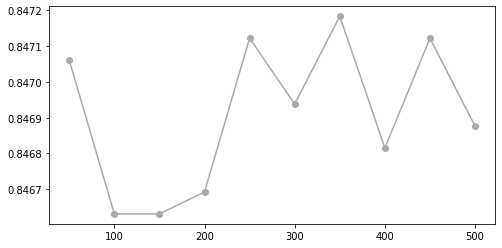

In [80]:
# Importing packages from sklearn 
from sklearn.ensemble import GradientBoostingClassifier

 
gb_results = []
gb_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in ada_estimators:
  gb_class = GradientBoostingClassifier(n_estimators=trees, random_state=101)
  gb_class.fit(x_census_train, y_census_train)
  y_pred = gb_class.predict (x_census_test)

  
  accuracy = np.mean(y_census_test == y_pred)
  gb_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(gb_results, gb_estimators).plot(color='darkgrey', marker='o')

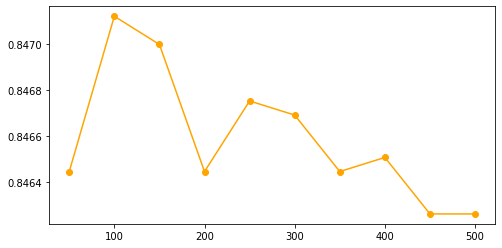

In [81]:
# Import the correct package
from xgboost import XGBClassifier
 
xgb_results = []
xgb_estimators = [50,100,150,200,250,300,350,400,450,500]

for trees in xgb_estimators:
  xgb_class = XGBClassifier(n_estimators=trees, random_state=101)
  xgb_class.fit(x_census_train, y_census_train)
  y_pred = xgb_class.predict (x_census_test)


  accuracy = np.mean(y_census_test == y_pred)
  xgb_results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(xgb_results, xgb_estimators).plot(color='orange', marker='o')

### 5. Compare Performance

In [82]:

# The results from what we built above
results = []
classifiers = [RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier]

#Common parameters
common_params = {'n_estimators':100,'random_state':101}

#Comparing performances. AUC & Accuracy
for option in classifiers:

  model = option(**common_params)
  model.fit(x_census_train, y_census_train)
  y_pred = model.predict (x_census_test)
  accuracy = np.mean(y_census_test == y_pred)
  AUC = roc_auc_score(y_census_test,y_pred)

  results.append([accuracy, AUC])

#Show the results we will get
comparison = pd.DataFrame(results).transpose()
comparison.columns = ['RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier']
comparison.index = ['Accuracy','AUC']
display(comparison)
display(common_params)

,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier
Accuracy,0.838216,0.844911,0.846631,0.847122
AUC,0.747542,0.746088,0.756732,0.756785


{'n_estimators': 100, 'random_state': 101}